In [1]:
fn1 = "junlang"
ln1 = "zhan"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD204_lab2", ln1, fn1])) + ".ipynb"
print filename

sd204_lab2_zhan_junlang.ipynb


In [2]:
import numpy as np
import time
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## Exercise 1

1

For the left side, we take $(XX^T+\lambda Id_n)$ as A and we take $b=A^{-1}y$ so by solving the linear system $y=Ab$, we can obtain b and then we can calculate the left side. The ride side can be done by the same method.<br>
After, we use numpy.allcolse() to verify if the right side is equal to the left side.

(a)

In [3]:
n=100
p=2000
lam=1e-5
mu=0
sigma=np.sqrt(5)
X=np.random.normal(mu,sigma,size=(n,p))
y=np.random.uniform(-1,1,size=(n,1))
Idn=np.eye(n)
Idp=np.eye(p)

A=X.dot(X.T)+lam*Idn
B=X.T.dot(X)+lam*Idp
left=X.T.dot(np.linalg.solve(A,y))
right=np.linalg.solve(B,X.T.dot(y))
np.allclose(left,right)

True

(b)

In [4]:
n=2000
p=100
lam=1e-5
mu=0
sigma=np.sqrt(5)
X=np.random.normal(mu,sigma,size=(n,p))
y=np.random.uniform(-1,1,size=(n,1))
Idn=np.eye(n)
Idp=np.eye(p)

A=X.dot(X.T)+lam*Idn
B=X.T.dot(X)+lam*Idp
left=X.T.dot(np.linalg.solve(A,y))
right=np.linalg.solve(B,X.T.dot(y))
np.allclose(left,right)

True

2

Calculate the time when computing the left side with different n and p.

In [5]:
time1=[]
for n in range(1,2000,200):
    for p in range(1,2000,200):
        X=np.random.normal(mu,sigma,size=(n,p))
        y=np.random.uniform(-1,1,size=(n,1))
        Idn=np.eye(n)
        Idp=np.eye(p)
        t0=time.time()
        A=X.dot(X.T)+lam*Idn
        left=X.T.dot(np.linalg.solve(A,y))
        time1.append(time.time()-t0)

Calculate the time when computing the right side with different n and p.

In [6]:
time2=[]
for n in range(1,2000,200):
    for p in range(1,2000,200):
        X=np.random.normal(mu,sigma,size=(n,p))
        y=np.random.uniform(-1,1,size=(n,1))
        Idn=np.eye(n)
        Idp=np.eye(p)
        t0=time.time()
        B=X.T.dot(X)+lam*Idp
        right=np.linalg.solve(B,X.T.dot(y))
        time2.append(time.time()-t0)

Presentation using graphs

The use of time of the 2 methods given n and p:


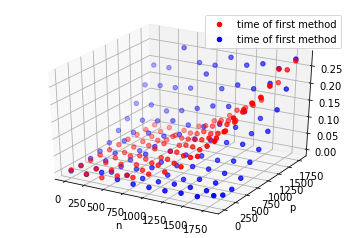

The boolean presentation: 1 means the first method takes more time, -1 is the inverse case.


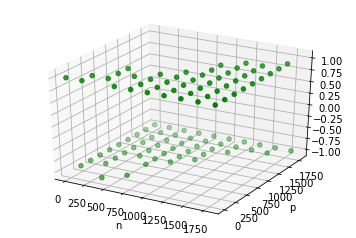

In [7]:
x=[]
y=[]
z=[]
for n in range(1,2000,200):
    for p in range(1,2000,200):
        x.append(n)
        y.append(p)

for i in range(len(time1)):
    if((time1[i]-time2[i])>0):
        z.append(1)
    else:
        z.append(-1)

print('The use of time of the 2 methods given n and p:')
ax=plt.subplot(111,projection='3d')
ax.scatter(x,y,time1,c='r',label='time of first method')
ax.scatter(x,y,time2,c='b',label='time of first method') 
plt.ylabel('p')
plt.xlabel('n')
plt.legend()
plt.show()

print('The boolean presentation: 1 means the first method takes more time, -1 is the inverse case.')
ax2=plt.subplot(111,projection='3d')
ax2.scatter(x,y,z,c='g')
plt.ylabel('p')
plt.xlabel('n')
plt.show()

From the graph, we can see that there is a clear seperation of the time performance with the 2 method which is the diagonal line. When n is greater than p, we prefer the second method. When p is greater than n, we prefer the first method.

## Exercise 2

3

The 3 distributions chosen are uniform distribution, student distribution and logistic distribution.

In [8]:
def matrix_uniform(n,p):
    a=-np.sqrt(6)
    b=np.sqrt(6)
    return np.random.uniform(a,b,size=(n,p))

def matrix_student(n,p):
    d=4
    return np.random.standard_t(d,size=(n,p))

def matrix_logistic(n,p):
    u=0
    s=np.sqrt(6)/np.pi
    return np.random.logistic(u,s,size=(n,p))

4

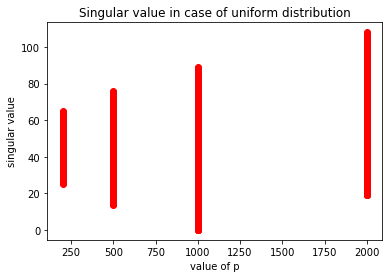

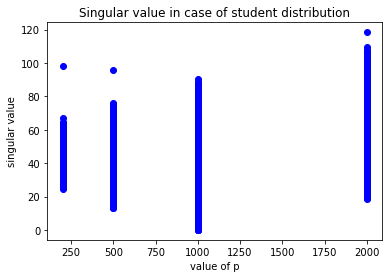

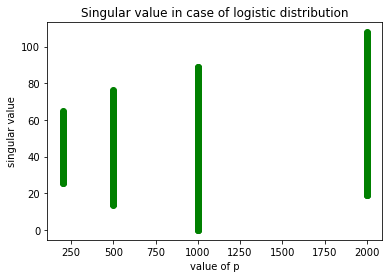

In [9]:
n=1000
p=[200,500,1000,2000]
x=[]
y1=[]
y2=[]
y3=[]
for i in range(len(p)):
    X=matrix_uniform(n,p[i])
    s=np.linalg.svd(X,compute_uv=False)
    for i in range(len(s)):
        y1.append(s[i])

        
for i in range(len(p)):
    X=matrix_student(n,p[i])
    s=np.linalg.svd(X,compute_uv=False)
    for i in range(len(s)):
        y2.append(s[i])

        
for i in range(len(p)):
    X=matrix_logistic(n,p[i])
    s=np.linalg.svd(X,compute_uv=False)
    for i in range(len(s)):
        y3.append(s[i])
        
for i in range(p[0]):
    x.append(p[0])
for i in range(p[1]):
    x.append(p[1])
for i in range(p[2]):
    x.append(p[2])
for i in range(1000):
    x.append(2000)
    
ax1=plt.scatter(x,y1,c='r')
plt.title('Singular value in case of uniform distribution')
plt.xlabel('value of p')
plt.ylabel('singular value')
plt.show()

ax2=plt.scatter(x,y2,c='b')
plt.title('Singular value in case of student distribution')
plt.xlabel('value of p')
plt.ylabel('singular value')
plt.show()

ax3=plt.scatter(x,y3,c='g')
plt.title('Singular value in case of logistic distribution')
plt.xlabel('value of p')
plt.ylabel('singular value')
plt.show()

5

We have $s=\sqrt{\lambda}$ where s is the singular value of X and $\lambda$ is the eigen value of $X^TX$.

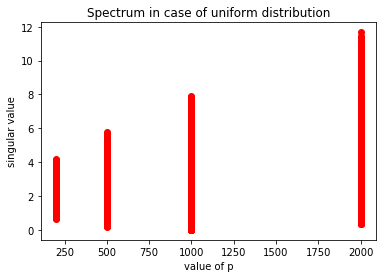

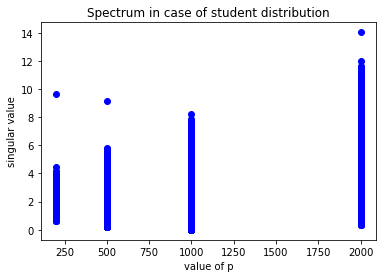

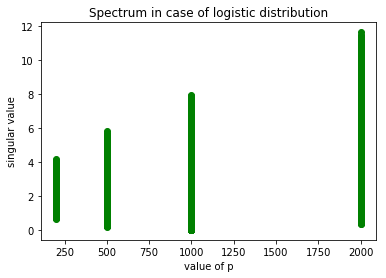

In [10]:
for i in range(len(y1)):
    y1[i]=y1[i]**2/n
    y2[i]=y2[i]**2/n
    y3[i]=y3[i]**2/n

ax1=plt.scatter(x,y1,c='r')
plt.title('Spectrum in case of uniform distribution')
plt.xlabel('value of p')
plt.ylabel('singular value')
plt.show()

ax2=plt.scatter(x,y2,c='b')
plt.title('Spectrum in case of student distribution')
plt.xlabel('value of p')
plt.ylabel('singular value')
plt.show()

ax3=plt.scatter(x,y3,c='g')
plt.title('Spectrum in case of logistic distribution')
plt.xlabel('value of p')
plt.ylabel('singular value')
plt.show()

## Exercise3

6

In [11]:
def power_method(X,n,u,v):
    for j in range(n):
        u=X.dot(v)
        v=X.T.dot(u)
        v=1.0*v/np.linalg.norm(v)
        u=1.0*u/np.linalg.norm(u)
    return u,v

7

We first calculate u and v by the power method. In order to verify that they are the singular vectors associated with the largest singular value of X, we use numpy.allclose() to check the equation $XX^Tu=s_{max}^2u$ and $X^TXv=s_{max}^2v$.

In [12]:
n=100
p=2000
mu=0
sigma=np.sqrt(5)
X=np.random.normal(mu,sigma,size=(n,p))
U,s,V=np.linalg.svd(X)
u0=U[:,0]
v0=V[0,:]
u=np.random.uniform(-1,1,size=n)
v=np.random.uniform(-1,1,size=p)
u,v=power_method(X,5000,u,v)
left=X.T.dot(X).dot(v)
right=s[0]**2*v
print np.allclose(left,right)
left=X.dot(X.T).dot(u)
right=s[0]**2*u
print np.allclose(left,right)

True
True


8

First set of initialization vectors:

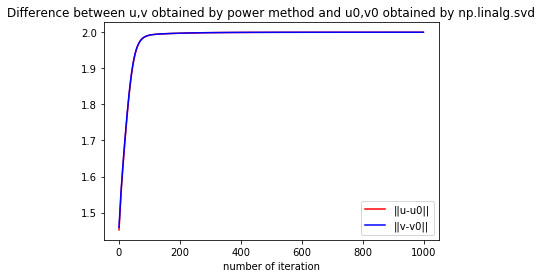

In [13]:
n_iter=1000
u_init=np.random.uniform(size=n)
v_init=np.random.uniform(size=p)
u=u_init
v=v_init
y1=[]
y2=[]
for i in range(n_iter):
    u1,v1=power_method(X,1,u,v)
    if(i>-1):
        y1.append(np.linalg.norm(u1-u0))
        y2.append(np.linalg.norm(v1-v0))
    u=u1
    v=v1
    
x=range(n_iter)
ax=plt.plot(x,y1,c='r',label=r"||u-u0||")
ax=plt.plot(x,y2,c='b',label=r"||v-v0||")
plt.xlabel("number of iteration")
plt.title("Difference between u,v obtained by power method and u0,v0 obtained by np.linalg.svd")
plt.legend()
plt.show()

Second set of initialization vectors:

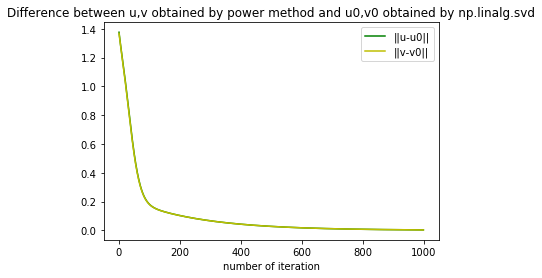

In [14]:
u=-u_init
v=-v_init
y3=[]
y4=[]
for i in range(n_iter):
    u1,v1=power_method(X,1,u,v)
    if(i>-1):
        y3.append(np.linalg.norm(u1-u0))
        y4.append(np.linalg.norm(v1-v0))
    u=u1
    v=v1

x=range(n_iter)
ax=plt.plot(x,y3,c='g',label=r"||u-u0||")
ax=plt.plot(x,y4,c='y',label=r"||v-v0||")
plt.xlabel("number of iteration")
plt.title("Difference between u,v obtained by power method and u0,v0 obtained by np.linalg.svd")
plt.legend()
plt.show()

From the two graphs above, we can see that there are 2 different limits:0 and 2. In fact, if u is a singular vector, then -u is also a singular vector, which explains the 2 different limits. Limit 0 means that u,v obtained by power method is the same as obtained by np.linalg.svd(). Limit 2 means that u,v obtained by power method is opposite of that obtained by np.linalg.svd() because the norm of u and v are both 1.

9

v is the sigular vector associated with the largest singular value of X. So we have<br>
$X^TXv=\lambda v$. The eigen value $\lambda$ can be obtained by $\frac{X^TX v[0]}{v[0]}$.<br>
At last $s_{max}=\sqrt{\lambda}$

In [15]:
s_max=np.sqrt(X.T.dot(X).dot(v)[0]/v[0])
print "The largest singular value obtained by np.linalg.svd:  %f" %s[0]
print "The largest singular value obtained by power method:  %f" %s_max

The largest singular value obtained by np.linalg.svd:  122.044856
The largest singular value obtained by power method:  122.041804


10

We let $X \leftarrow  X-u_0s_0v_0^T$ where $s_0$ is the largest singular value and $u_1$,$v_1$ the associated singular vectors. Then we compute one more time the power method using new X.

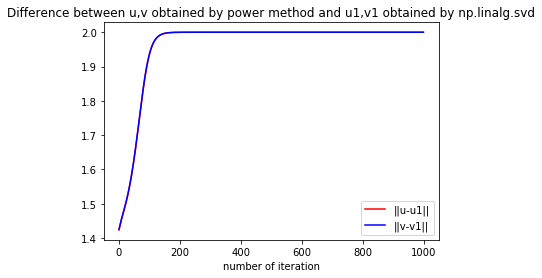

In [16]:
u=u_init
v=v_init
u,v=power_method(X,n_iter,u,v)
X_=X-s_max*u.reshape(n,1).dot(v.reshape(1,p))
u2=U[:,1]
v2=V[1,:]
y1=[]
y2=[]
u=u_init
v=v_init
for i in range(n_iter):
    u1,v1=power_method(X_,1,u,v)
    if(i>-1):
        y1.append(np.linalg.norm(u1-u2))
        y2.append(np.linalg.norm(v1-v2))
    u=u1
    v=v1
    
x=range(n_iter)
ax=plt.plot(x,y1,c='r',label=r"||u-u1||")
ax=plt.plot(x,y2,c='b',label=r"||v-v1||")
plt.xlabel("number of iteration")
plt.title("Difference between u,v obtained by power method and u1,v1 obtained by np.linalg.svd")
plt.legend()
plt.show()

11

In [17]:
df = pd.read_csv('http://josephsalmon.eu/enseignement/TELECOM/SD204/defra_consumption.csv',sep=';',index_col=0)
df.head()

,England,Wales,Scotland,N Ireland
Cheese,105,103,103,66
Carcass meat,245,227,242,267
Other meat,685,803,750,586
Fish,147,160,122,93
Fats and oils,193,235,184,209


12

In [18]:
stdmodel=StandardScaler()
stdmodel.fit(df)
X=stdmodel.transform(df)

13

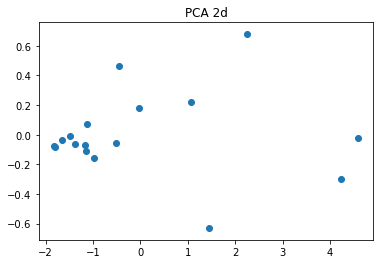

In [19]:
pca2 = PCA(n_components=2)
pca2.fit(X)
X_2d=pca2.transform(X)

plt.scatter(X_2d[:,0],X_2d[:,1])
plt.title("PCA 2d")
plt.show()

14

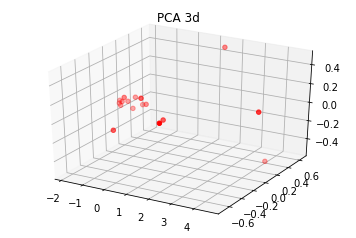

In [20]:
pca3 = PCA(n_components=3)
pca3.fit(X)
X_3d=pca3.transform(X)

ax=plt.subplot(111,projection='3d')
ax.scatter(X_3d[:,0],-X_3d[:,1],-X_3d[:,2],c='r')
plt.title("PCA 3d")
plt.show()


15

(a)

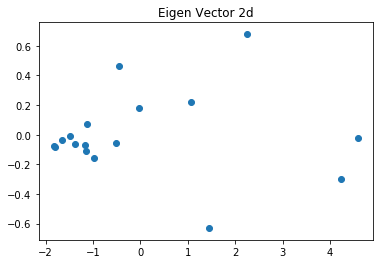

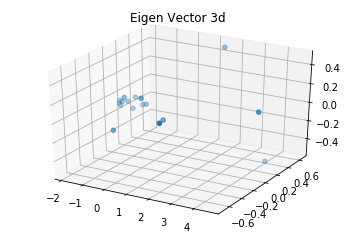

In [21]:
t0=time.time()
XTX=X.T.dot(X)
w,V=np.linalg.eigh(XTX)
X_2d=X.dot(np.column_stack((V[:,3],V[:,2])))
time_eig_2d=time.time()-t0
plt.scatter(-X_2d[:,0],-X_2d[:,1])
plt.title("Eigen Vector 2d")
plt.show()

t0=time.time()
XTX=X.T.dot(X)
w,V=np.linalg.eigh(XTX)
X_3d=X.dot(np.column_stack((V[:,3],V[:,2],V[:,1])))
time_eig_3d=time.time()-t0
ax=plt.subplot(111,projection="3d")
ax.scatter(-X_3d[:,0],X_3d[:,1],-X_3d[:,2])
plt.title("Eigen Vector 3d")
plt.show()

(b)

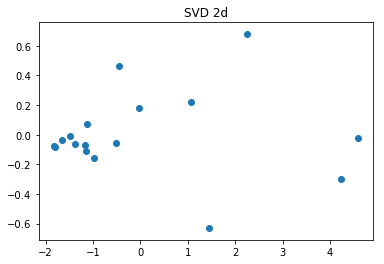

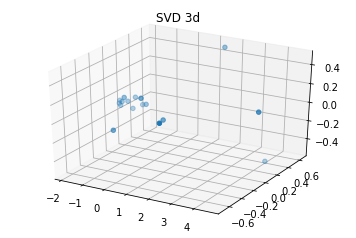

In [22]:
t0=time.time()
U,s,V=np.linalg.svd(X)
V2=V.T[:,0:2]
X_2d=X.dot(V2)
time_svd_2d=time.time()-t0
plt.scatter(X_2d[:,0],-X_2d[:,1])
plt.title("SVD 2d")
plt.show()

t0=time.time()
U,s,V=np.linalg.svd(X)
V3=V.T[:,0:3]
X_3d=X.dot(V3)
time_svd_3d=time.time()-t0
ax=plt.subplot(111,projection="3d")
ax.scatter(X_3d[:,0],X_3d[:,1],X_3d[:,2])
plt.title("SVD 3d")
plt.show()

(c)

In [23]:
print "Time of eigen vector for 2d: %f" %time_eig_2d
print "Time of eigen vector for 2d: %f" %time_eig_2d
print "Time of svd for 2d: %f" %time_svd_2d
print "Time of svd for 3d: %f" %time_svd_2d

Time of eigen vector for 2d: 0.001000
Time of eigen vector for 2d: 0.001000
Time of svd for 2d: 0.001000
Time of svd for 3d: 0.001000


Since the dataset is very small, the computation for all cases are very fast. We cannot tell the differences.

## Exercise 5

In [24]:
from sklearn.datasets import fetch_lfw_people
# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape 
X = lfw_people.data
n_features = X.shape[1] 
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0] 
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


16

In [25]:
print "Height of each picture: %d" %h
print "Width of each picture: %d" %w

Height of each picture: 50
Width of each picture: 37


Since $1850=50\times37$ we can see that the features are pixels. 

17

(a)

In [26]:
stdmodel=StandardScaler()
stdmodel.fit(X)
X_std=stdmodel.transform(X)

for i in range(200,n_features):
    pca = PCA(n_components=i)
    pca.fit(X_std)
    if(np.sum(pca.explained_variance_ratio_)>=0.95):
        break

In [27]:
n_f=i
pca = PCA(n_components=n_f)
pca.fit(X_std)
X1=pca.transform(X_std)
lg_model=LogisticRegression()
lg_model.fit(X1,y)
print "Number of variables selected: %d" %n_f
print "Precision: %f" %lg_model.score(X1,y)

Number of variables selected: 207
Precision: 0.994565


(b)

Here, we suppose the candidate set of the number of principle axis are [25,50,75,100,125,150,175,200,225,250]

In [28]:
logistic = LogisticRegression()
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
n_components = [25,50,75,100,125,150,175,200,225,250]
# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,dict(pca__n_components=n_components),cv=5)                              
estimator.fit(X_std, y)
print "Number of variables selected: %d" %estimator.best_estimator_.named_steps['pca'].n_components

Number of variables selected: 125


In [29]:
pca = PCA(n_components=estimator.best_estimator_.named_steps['pca'].n_components)
pca.fit(X_std)
X2=pca.transform(X_std)
lg_model=LogisticRegression()
lg_model.fit(X2,y)
print "Precision: %f" %lg_model.score(X2,y)

Precision: 0.961180


Method (b) select fewer variables than method (a) without losing too much precision. 